In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

In [4]:
X_train_2label=data_list[0]
y_train_2label=data_list[1]
X_test_2label=data_list[2]
y_test_2label=data_list[3]

X_train_oversampled = pd.read_csv("../data/X_train_oversampling.csv")
X_train_oversampled = X_train_oversampled.iloc[:, 1:]
y_train_oversampled = pd.read_csv("../data/y_train_oversampling.csv")['Credit_Status']

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_oversampled, y_train_oversampled)


LogisticRegression(max_iter=1000)

In [6]:
y_pred = model.predict(X_test_2label)

In [7]:
accuracy = accuracy_score(y_test_2label, y_pred)

In [8]:
report = classification_report(y_test_2label, y_pred)

In [9]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.5892956184137549


In [10]:
print(report)

              precision    recall  f1-score   support

         Bad       0.03      0.52      0.06       178
        Good       0.98      0.59      0.74      7034

    accuracy                           0.59      7212
   macro avg       0.51      0.56      0.40      7212
weighted avg       0.96      0.59      0.72      7212



Model Evaluation 

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, auc, ConfusionMatrixDisplay

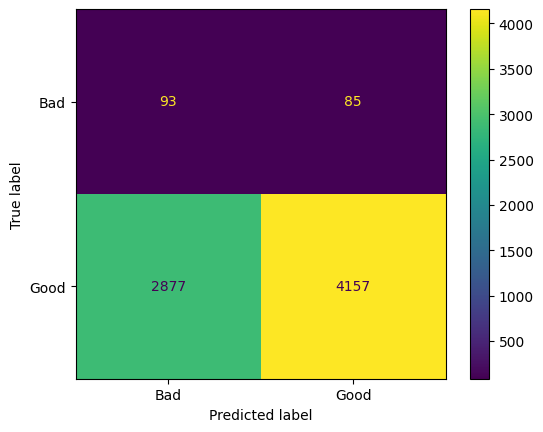

In [12]:
# Confusion Matrix

cm = confusion_matrix(y_test_2label, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Bad', 'Good'])
cm_display.plot()
plt.show()

In [13]:
# AUC-ROC score

lr_probs = model.predict_proba(X_test_2label) # probability estimates 
lr_probs = lr_probs[:,1] # probabilities that the model assigned to the examples being positive
lr_auc = roc_auc_score(y_test_2label, lr_probs, average = 'micro')
print(f"ROC-AUC score: {round(lr_auc, 3)}")

# Model appears to be performing slightly better than random guessing

ROC-AUC score: 0.568


[0.         0.         0.00561798 ... 0.98314607 1.         1.        ]
[0.00000000e+00 2.84333239e-04 7.10833096e-04 ... 9.99857833e-01
 9.99857833e-01 1.00000000e+00]


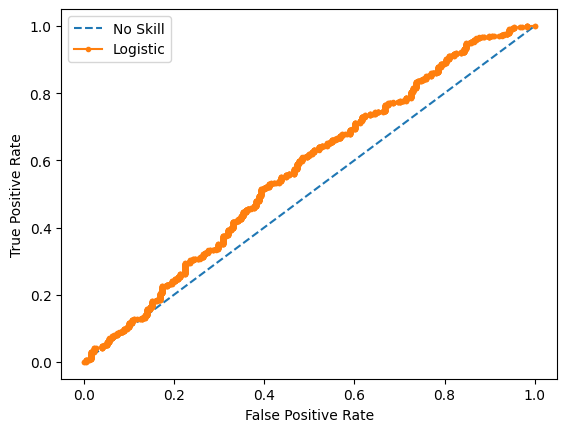

In [14]:
# AUC-ROC Plot 

y_test_2label_binary = y_test_2label.replace(['Bad', 'Good'], [0, 1]) # label 0 for bad, label 1 for good

lr_fpr, lr_tpr, thresholds = roc_curve(y_test_2label_binary, lr_probs) 
# thresholds[0] represents no instances being predicted, arbitrarily set to np.inf
print(lr_fpr)
print(lr_tpr)

# to get the no skill line
ns_probs = [0 for _ in range(len(y_test_2label))]
ns_fpr, ns_tpr, thresholds = roc_curve(y_test_2label_binary, ns_probs)

#plotting
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = "No Skill")
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [15]:
# Precision recall score 

y_pred_binary = [0 if p == 'Bad' else 1 for p in y_pred] # label 0 for bad, label 1 for good

lr_precision, lr_recall, thresholds = precision_recall_curve(y_test_2label_binary, lr_probs)
# print(lr_precision) # [0.97531891 0.97531549 0.97545076 ... 0.66666667 0.         1.        ]
# print(lr_recall) # [1.00000000e+00 9.99857833e-01 9.99857833e-01 ... 2.84333239e-04, 0.00000000e+00 0.00000000e+00]
# print(thresholds) # [0.83412032 0.86690294 0.87218788 ... 0.9950032  0.99665604 0.99857428]
# predicted probabilities do not match the actual probabilities 

lr_f1, lr_auc = f1_score(y_test_2label_binary, y_pred_binary), auc(lr_recall, lr_precision)
print(f"f1-score: {round(lr_f1, 3)}\nauc={round(lr_auc, 3)}")

f1-score: 0.737
auc=0.978


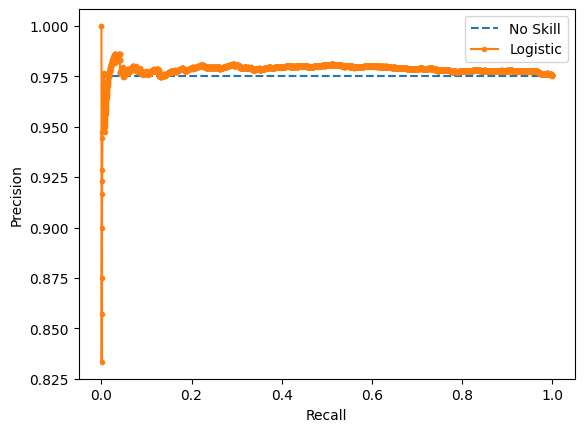

In [16]:
# Precision- Recall curve ???????
no_skill = len(y_test_2label_binary[y_test_2label_binary==1])/len(y_test_2label_binary)
plt.plot([0,1], [no_skill, no_skill], linestyle = '--', label = 'No Skill')
plt.plot(lr_recall, lr_precision, marker = '.', label = "Logistic")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

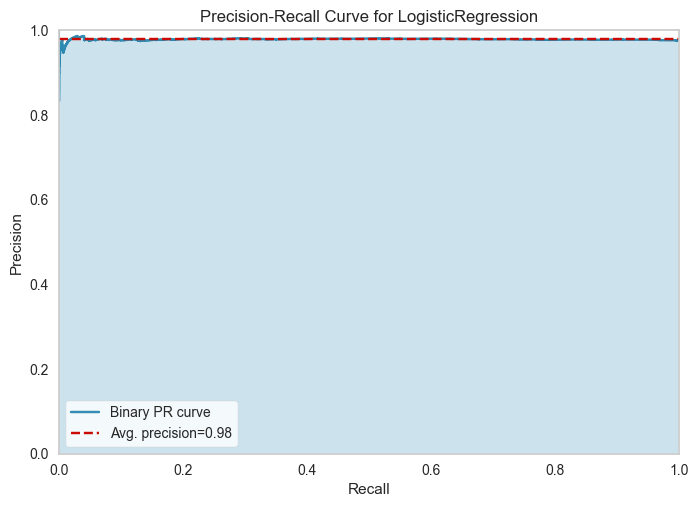

In [18]:
from yellowbrick.classifier import precision_recall_curve
y_train_oversampled = y_train_oversampled.replace(['Bad', 'Good'], [0, 1])
viz = precision_recall_curve(LogisticRegression(max_iter = 1000), X_train_oversampled, y_train_oversampled, X_test_2label, y_test_2label_binary)